<font face="B Mitra" size=4>
<div dir=rtl>
<p>
کتابخانه numpy را ایمپورت می‌کنیم.
</div>
</font>

In [2]:
import numpy as np

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
با استفاده از تابع make_blobs از کتابخانه sklearn مجموعه داده‌ای که به صورت خطی جدایی پذیر است می‌سازیم.که ۱۰۰ نمونه و ۱۰ فیچر دارد.
</div>
</font>

In [4]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples = 100, n_features = 10, centers=2,random_state = 41)


<font face="B Mitra" size=4>
<div dir=rtl>
<p>
کلاس F با متد sign را یک یک متد استاتیک است تعریف می‌کنیم در واقع در متد sign تابع علامت را پیاده سازی می‌کنیم به طوری که اگر مقدار ورودی نامنفی بود ۱ را برگرداند و در غیر اینصورت ۰ را برگرداند.(چون لیبل داده‌ها صفر و یک است از این نوع تابع علامت استفاده می‌کنیم.)
</div>
</font>

In [6]:
class F:
  @staticmethod
  def sign(x):
    if(x>= 0):
      return 1
    return 0

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
کلاس Perceptron وظیفه نگه داری وزن ها و بایاس را دارد و ورودی آن اندازه ورودی است که بسته به مجموعه داده مورد استفاده مشخص می‌شود.
در کلاس Perceptron وزن‌ها و بایاس را به ترتیب در دو اتریبیوت Wو b ذخیره می‌کنیم.

متد forward در این کلاس وظیفه محاسبه y برحسب ورودی را دارد برای محاسبه y نیاز به ترانهاده ماتریس وزن‌ها داریم که آن را در ورودی ضرب می‌کنیم و با بایاس جمع می‌بندیم و در نهایت با استفاده از متد sign کلاس F خروجی را مشخص می کنیم و در y_hat ذخیره می کنیم سپس y_hat را ریترن می‌کنیم.
</div>
</font>

In [7]:
class Perceptron:
  def __init__(self,input_size):
    self.W = np.random.rand(input_size)
    self.b = np.random.rand()
  def forward(self,input):

    self.W_transpose = np.transpose(self.W)

    self.y_hat = F.sign(np.dot(self.W_transpose,input)+self.b)
    return self.y_hat


<font face="B Mitra" size=4>
<div dir=rtl>
<p>
وظیفه کلاس Optimizer آپدیت کردن وزن ها است به طوری که در نهایت هیچ خطایی نداشته باشیم.ورودی این کلاس model است که یک instance از کلاس Perceptron را به عنوان ورودی می‌گیرد و در اتریبیوت model ذخیره می کند.
متد update وظیفه آپدیت‌ کردن وزن ها و بایاس را دارد و ورودی، لیبل و مقدار پیش بینی شده توسط شبکه را می‌گیرد به طوری که وزن در مرحله k+1 برابر است با وزن در مرحله k بعلاوه (y-y_hat)*ماتریس ورودی.
بایاس در مرحله k+1 برابر است با بایاس در مرحله k بعلاوه y-y_hat

*مقدار y_hat در مرحله k مدنظر است.
</div>
</font>

In [8]:
class Optimizer:
  def __init__(self,model):
    self.model = model
  def update(self,x,y,y_hat):
    self.model.W = self.model.W+(y - y_hat)*x
    self.model.b = self.model.b +(y-y_hat)



<font face="B Mitra" size=4>
<div dir=rtl>
<p>
تعداد ویژگی‌های مجموعه داده موجود برابر ۱۰ است بر این مبنا یک شی Percetron می‌سازیم و در perceptron_model ذخیره می‌کنیم و آن را به عنوان ورودی به Optimizer  می‌دهیم و یک شی Optimizer می‌سازیم و  درoptimizer ذخیره می‌کنیم.
</div>
</font>

In [9]:
perceptron_model = Perceptron(10)
optimizer = Optimizer(perceptron_model)




<font face="B Mitra" size=4>
<div dir=rtl>
<p>
در طی ۱۰۰۰ بار تکرار حلقه با استفاده از فیچرها در متد forward مقدار پیش بینی شده توسط شبکه را بدست می‌آورد و در y_hat ذخیره می کند سپس با استفاده از متد update وزن ها و بایاس را آپدیت می کند.
</div>
</font>

In [12]:
n_iter = 1000
for _ in range(n_iter):
  for x,y in zip(X,Y):
     y_hat = perceptron_model.forward(x)
     optimizer.update(x, y, y_hat)
print(f"perceptron's weights:{perceptron_model.W}")
print(f"perceptron's bias:{perceptron_model.b}")


perceptron's weights:[  1.86887516   4.48003183  -9.2912755    6.37341914   9.38991479
 -13.59840836  10.7374971   -5.59809939  -2.48312001   2.64162776]
perceptron's bias:0.7103080390975334


<font face="B Mitra" size=4>
<div dir=rtl>
<p>
با استفاده از کتابخانه matplotlib و مجموعه داده make_blobs که ۲ فیچر دارد ابر صفحه جداکننده و داده ‌ها را نمایش می‌دهیم
با استفاده از متد scatter به طوری که داده‌ها بر اساس لیبلشان رنگ‌آمیزی شوند آنها را نشان می‌دهیم
با استفاده از وزن ها و بایاس خط را رسم می کنیم(با استفاده از متد plot )

</div>
</font>

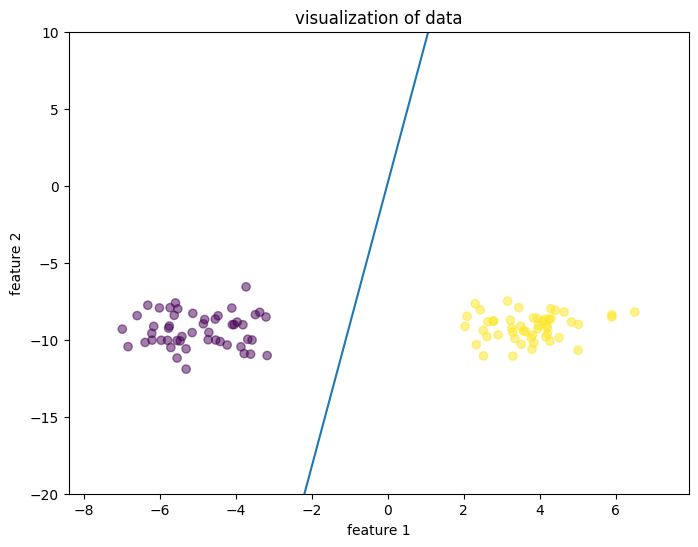

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,label = make_blobs(n_samples = 100, n_features = 2, centers=2,random_state = 41)

perceptron_model_2 = Perceptron(2)
optimizer_2= Optimizer(perceptron_model_2)
n_iter = 1000
for _ in range(n_iter):
  for x,y in zip(X,label):
     y_hat = perceptron_model_2.forward(x)
     optimizer_2.update(x, y, y_hat)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=label, cmap='viridis', alpha=0.5)
plt.title("visualization of data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -((perceptron_model_2.b) +  perceptron_model_2.W[0]* x_vals)/perceptron_model_2.W[1]
axes.set_ylim(-20,10)
plt.plot(x_vals, y_vals, '-')
plt.show()